<a href="https://colab.research.google.com/github/EduGod0y/Quantum-Mechanics/blob/main/Atividade2_Qu%C3%A2ntica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Eduardo Godoy da Silveira - 00313426
###17/08/2021 - Atividade 2 Física Quântica

###Considere uma partícula num poço quadrado infinito com largura a, e a seguinte função de onda para $t= 0:Ψ(x,0) =Ax$ para $0 ≤ x ≤ \frac{a}{2} $ e $A(a−x)$ para $\frac{a}{2} ≤ x ≤ a $ .

###a) Faça um desenho (a mão ou usando python) da Psi(x,0) e determine A

In [ ]:
#@title Imports
%matplotlib inline

from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as spy
import matplotlib.animation as animation
import scipy.integrate as sci 


Para determinarmos A para uma partícula precisamos resolver a integral:
$$ 
\mathcal\int_0^a|Ψ(x,0)|^2=1
$$
$$
\mathcal\int_0^\frac{a}{2}|Ψ(x,0)|^2 + \int_\frac{a}{2}^a|Ψ(x,0)|^2 = 1
$$
Calculando essas integrais no Wolphram assim como a demonstração feita em aula do dia 11/08:
$$
A = \sqrt{\frac{12}{a^3}}
$$



Text(0.5, 1.0, '$\\Psi(x,0)$')

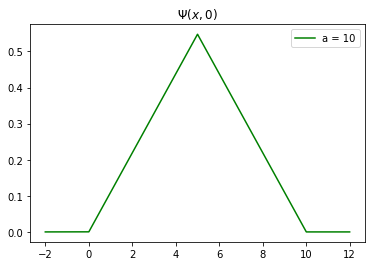

In [ ]:
def psi0(x,a):
    A = np.sqrt(12/a**3)
    if 0<x<(a/2):
        return A*x
    elif (a/2<x<a):
        return A*(a-x)
    else:
        return 0

n=10000
x_list = np.linspace(-2,12,n)
psi0_list = [0]

i=0
while i<n-1:
    psi0_list.append(psi0(x_list[i],10))
    i = i + 1

plt.plot(x_list,psi0_list,color='green',label='a = 10')
plt.legend()
plt.title('$\Psi(x,0)$')

###b) Calcule Ψ(x, t) para 3 tempos diferentes e faça um gráfico (usando python). Pode ser um filme, mas é não obrigatório.

Aplicando na solução geral:
$$
\mathcal Ψ(x,t) = \sum_{n=1}^\infty c_n \sqrt\frac{2}{L} \sin({\frac{n\pi}{L}x}) e^{-i(n^2 \pi^2 \hslash / 2mL^2)t}
$$

$$
\mathcal C_n = \sqrt{\frac{2}{L}} \int_{0}^{a} \sin({\frac{n\pi}{L}x})  Ψ(x,0) dx
$$
Temos que:
$$
\mathcal Ψ(x,t) = \frac{4\sqrt{6}}{\pi^2} \sqrt{\frac{2}{a}}\sum_{n=1,3,5,...}^\infty (-1)^{(n-1)/2} \frac{1}{n^2} \sin(\frac{n\pi}{a}x)e^{(-E_n t/\hslash)}
$$
onde
$$
E_n = \frac{n^2 \pi^2 \hslash^2}{2ma^2}
$$

In [ ]:
c_list = np.zeros(99)
h_cortado = 1
m = 1
a=10
E_list = np.zeros(99)

def integ_cn(n,x,a):
    return np.sqrt(2/a)*np.sin((n*np.pi*x)/a)*psi0(x,a)

for n in range(1,100):
    c_list[n-1],err = np.float128(sci.quad(lambda x :integ_cn(n,x,3),0,3))
    E_list[n-1] = ((n**2)*(np.pi**2)*(h_cortado**2)/(2*m*a**2))
    


In [ ]:
lista1=[]
lista2=[]
lista3=[]

def psi_real(nmax,x,t):
    ss =0
    for n in range(1,nmax):
        ss = ss + c_list[n-1]*np.sqrt(2/a)*np.sin((n*np.pi*x)/a)*np.cos(E_list[n-1]*t/h_cortado)
    return ss

def psi_imag(nmax,x,t):
    ss =0
    for n in range(1,nmax):
        ss = ss + c_list[n-1]*np.sqrt(2/a)*np.sin((n*np.pi*x)/a)*np.sin(-E_list[n-1]*t/h_cortado)
    return ss
  
nmax = 20
dt = 0
for t in range(100):
  dt = dt+t*.1
  psi1=[]
  psi2=[]
  for x in x_list:
    psi1.append(psi_real(nmax,x,t))
    psi2.append(psi_imag(nmax,x,t))
  lista1.append(psi1)
  lista2.append(psi2)

In [ ]:
for i in range(len(lista1)):
  plt.plot(x_list,lista2[i], label = 'parte imaginária',color='blue')
  plt.plot(x_list,lista1[i], label = 'parte real',color='red')
  plt.xlim(-3,13)
  plt.ylim(-0.6,0.6)
  plt.xlabel('X')
  plt.ylabel('$\Psi(x,t)$')
  plt.legend()
  plt.title('Gráfico para t={:03d}x10^-2s'.format(i))
  plt.savefig('teste{:03d}.jpeg'.format(i))
  plt.show()

In [ ]:
import glob
from PIL import Image

# filepaths
fp_in = "teste0*.jpeg"
fp_out = "grafico1.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=100, loop=0)

###{c) Expanda $\Psi(x,0)$ e $\Psi(x,0)^*$ nos estados estacionários e obtenha o valor esperado da energia, correspondente ao operador $H = \frac {-\hbar^2}{2 m} \frac{d^2}{dx^2}$ como função dos coeficientes desta expansão ($c_n$) e autovalores ($E_n$) dos estados estacionários.  Interprete esta expressão e finalmente calcule numericamente a probabilidade que  uma medida de energia resulte em $E_1$.}

$$
H = \frac {-\hbar^2}{2 m} \frac{d^2}{dx^2}
$$
Multiplicando por $\Psi(x,0)$:
$$
H \Psi(x,0) = \frac {-\hbar^2}{2 m} \frac{d^2}{dx^2} \Psi(x,0)
$$

Isolando H e aplicando uma integral:
$$
<H> = \int dx \Psi(x,0)H\Psi(x,0)^*
$$
Abrindo em somatório:
$$
<H> = \int dx \sum_{n} c_n \phi_n H \sum_{m} c_m^* \phi_m^*
$$
Como $H\phi_n=E_n\phi_n$:
$$
<H> = \sum_{n,m} c_nc_m^*E_n \int \phi_n \phi_m^* dx
$$
Sabendo que $\int \phi_n \phi_m^* dx = 1$:
$$
\boxed{<H> = \sum_{n} |c_n|^2E_n}
$$
Se interpretarmos $|c_n|^2$ como a probabilidade de encontrar essa partícula no estado $n$, podemos dizer que essa expressão nos da uma média ponderada da energia do sistema, onde a probabilidade $P(n)$ dada por $|c_n|^2$ seria o peso das ponderações da média.
Então assim, a probabilidade que uma medida resulte em $E_1$ pode ser descrita em:
$$
P(1) = |c_1|^2
$$
Abrindo $c_1$:
$$
P(1) = | \frac{4\sqrt{6}}{1^2\pi^2} \sin(1\frac{\pi}{2})|^2=\boxed{0,9853...}
$$

###d) Numericamente determine o valor esperado da energia.
$$
<H> = \sum_{n} |c_n|^2E_n
$$
Abrindo $c_n$ e $E_n$:
$$
<H> = \sum_{n} | \frac{4\sqrt{6}}{n^2\pi^2} \sin(n\frac{\pi}{2})|^2 \frac{n^2 \pi^2 \hslash^2}{2ma^2}
$$
Tirando as constantes do somatório e aplicando o quadrado:
$$
<H> = \frac{96}{\pi^4} \frac{\pi^2\hslash^2}{2ma^2} \sum_{n} \frac{1}{n^2}\sin^2(n\frac{\pi}{2})
$$
$$
<H> = \frac{48\hslash^2}{\pi^2ma^2}  \sum_{n} \frac{1}{n^2}
$$
Aplicando para os $n$ ímpares vemos que o somatório tende a $\frac{\pi^2}{8}$, então:
$$
\boxed{<H> = \frac{6\hslash^2}{ma^2}}
$$


###Esse trabalho foi produzido em Google Colab exclusivamente por mim. Nenhuma parte deste trabalho (texto e fórmulas) foram copiadas digitalmente de outras fontes.

Eduardo G. da Silveira